In [1]:
import numpy as np

class KalmanFilter:
  def __init__(self,F,H,Q,R,x0,P0):
    self.F=F
    self.H=H
    self.Q=Q
    self.R=R
    self.X=x0
    self.P=P0

  def predict(self):
    self.X=np.dot(self.F,self.X)
    self.P=np.dot(np.dot(self.F,self.P),self.F.T)+self.Q

  def update(self,z):
    y=z-np.dot(self.H,self.X)
    S=np.dot(np.dot(self.H,self.P),self.H.T)+self.R
    K=np.dot(np.dot(self.P,self.H.T),np.linalg.inv(S))
    self.X=self.X+np.dot(K,y)
    self.P=np.dot(np.eye(self.F.shape[0])-np.dot(K,self.H),self.P)
     

In [2]:
dt=0.1
F=np.array([[1,dt],[0,1]])
H=np.array([[1,0]])
Q=np.diag([0.1,0.1])
R=np.array([[1]])
x0=np.array([0,0])
P0=np.diag([1,1])

In [3]:
kf=KalmanFilter(F,H,Q,R,x0,P0)

In [4]:
true_states=[]
measurements=[]
for i in range(100):
  true_states.append([i*dt,1])
  measurements.append(i*dt+np.random.normal(scale=1))

In [5]:

est_states=[]
for z in measurements:
  kf.predict()
  kf.update(np.array([z]))
  est_states.append(kf.X)

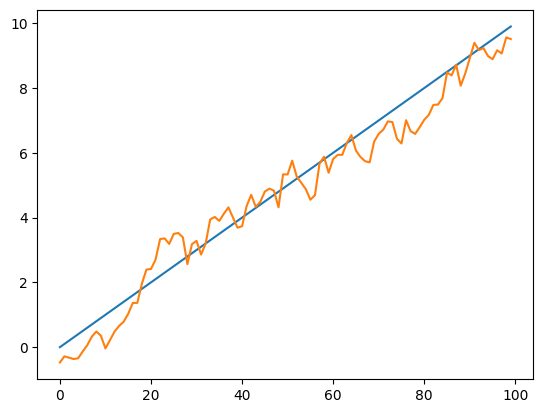

In [6]:
import matplotlib.pyplot as plt
plt.plot([s[0] for s in true_states],label='true')
plt.plot([s[0] for s in est_states],label='estimate')
plt.legend
plt.show()